In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('1.csv')

In [22]:
df=df.drop(' 4 for malignant)',axis=1)

In [23]:
df =df.replace(to_replace='?',value=np.nan)
df = df.fillna(0)

In [24]:
df['Bare Nuclei']=pd.to_numeric(df['Bare Nuclei'])
df.rename(columns={'Class: (2 for benign,  4 for malignant)': 'Class'}, inplace=True)

In [25]:
y=df.Class
X=df.drop('Class',axis=1)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf = RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
impo=clf.feature_importances_

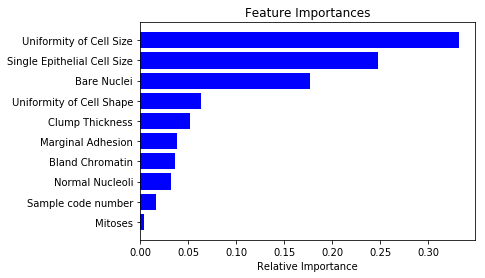

In [29]:
features = X.columns
importances = impo
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), 
         importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
X=X.drop(['Sample code number','Mitoses'],axis=1)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [37]:
clf = RandomForestClassifier(max_depth=4,min_samples_leaf=3,min_samples_split=17,n_estimators=16,bootstrap=True,max_leaf_nodes=43)
scores = cross_val_score(clf, X, y, cv=10)

In [38]:
np.mean(scores)

0.9643449100399499

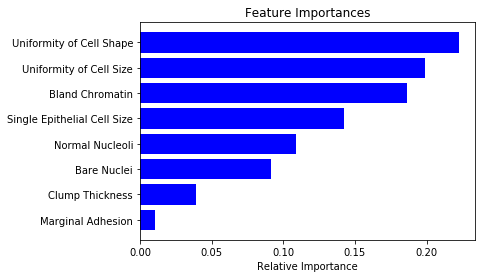

In [34]:
clf.fit(X,y)
impo=clf.feature_importances_
features = X.columns
importances = impo
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), 
         importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_g = { 'n_estimators':np.arange(1,25,1), 
           'min_samples_leaf':[3], 
           'min_samples_split':[18,19,17], 
           'bootstrap':[True,False], 
           'max_depth':[4,5,6,3],
          'max_features':["auto","log2"],
          'max_leaf_nodes':[40,41,42,43,44,45,46,47,48]} 
clf=RandomForestClassifier() 
gridse = GridSearchCV(clf,param_grid=param_g) 
gridse.fit(X,y)
print(gridse.best_score_) 
print(gridse.best_params_)

0.9742489270386266
{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 43, 'min_samples_leaf': 3, 'min_samples_split': 17, 'n_estimators': 11}
